In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [17]:
EPISODE_PATH = "/home/volkan/Documents/Codes/carla_env/data/dynamic_model_data_20Hz_action_repeat_4/train/episode_0/ego/"

In [22]:
# Fetch all .json files in the episode path
episode_files = [f for f in os.listdir(EPISODE_PATH) if f.endswith('.json')]
# Sort the files in ascending order in terms of integer values
episode_files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [40]:
location_ = np.empty((len(episode_files), 3))
rotation_ = np.empty((len(episode_files), 3))
velocity_ = np.empty((len(episode_files), 3))
action_ = np.empty((len(episode_files), 3))
for (ix ,file) in enumerate(episode_files):
    # Read the json file
	with open(EPISODE_PATH + file) as json_file:
		data = json.load(json_file)
		# Get the data from the json file
		location_[ix] = [data['location']['x'], data['location']['y'], data['location']['z']]
		rotation_[ix] = [data['rotation']['roll'], data['rotation']['pitch'], data['rotation']['yaw']]
		velocity_[ix] = [data['velocity']['x'], data['velocity']['y'], data['velocity']['z']]
		action_[ix] = [data['control']['throttle'], data['control']['steer'], data['control']['brake']]


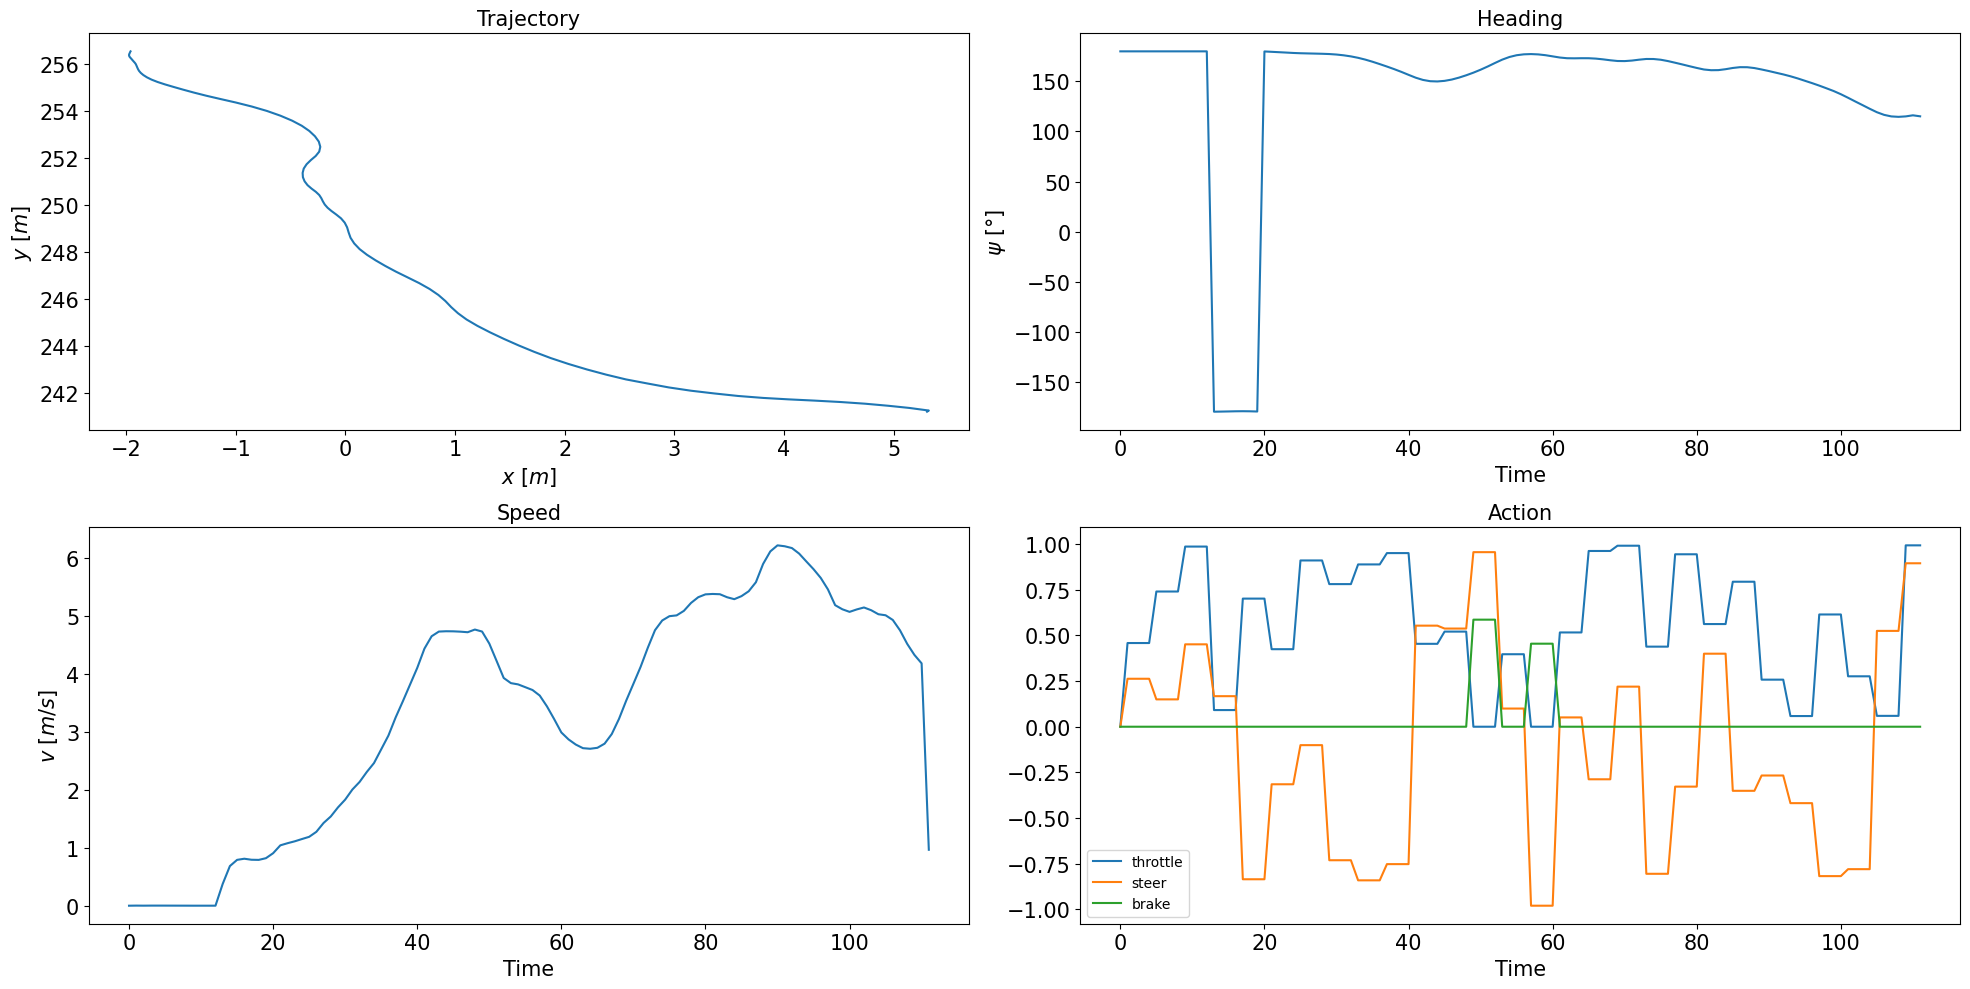

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fontsize = 15
# Plot x-y trajectory
axs[0][0].plot(location_[:, 1], location_[:, 0])
axs[0][0].set_title('Trajectory', fontsize = fontsize)
axs[0][0].set_xlabel('$x$ [$m$]', fontsize = fontsize)
axs[0][0].set_ylabel('$y$ [$m$]', fontsize = fontsize)

# Plot heading/yaw
axs[0][1].plot(rotation_[:, 2])
axs[0][1].set_title('Heading', fontsize = fontsize)
axs[0][1].set_xlabel('Time', fontsize = fontsize)
axs[0][1].set_ylabel('$\psi$ [°]', fontsize = fontsize)

# Plot speed
axs[1][0].plot(np.linalg.norm(velocity_, axis=1))
axs[1][0].set_title('Speed', fontsize = fontsize)
axs[1][0].set_xlabel('Time', fontsize = fontsize)
axs[1][0].set_ylabel('$v$ [$m/s$]', fontsize = fontsize)

# Plot action
axs[1][1].plot(action_[:, 0], label='throttle')
axs[1][1].plot(action_[:, 1], label='steer')
axs[1][1].plot(action_[:, 2], label='brake')
axs[1][1].set_title('Action', fontsize = fontsize)
axs[1][1].legend()
axs[1][1].set_xlabel('Time', fontsize = fontsize)
# axs[3].set_ylabel('$a$')

# Increase the font size of the ticks
for ax in axs.flat:
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    


plt.tight_layout()


In [68]:
fig.savefig('ego_model_dataset_visualization.png')